In [9]:
!apt-get update
!apt-get install openjdk-11-jdk

Hit:1 https://cli.github.com/packages stable InRelease
Get:2 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,632 B]
Get:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Get:4 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:5 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Hit:6 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:7 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:8 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [2,123 kB]
Get:9 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease [18.1 kB]
Get:10 https://r2u.stat.illinois.edu/ubuntu jammy/main amd64 Packages [2,825 kB]
Hit:11 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:12 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:13 http://archive.ubuntu.com/ubuntu jammy-backports I

In [11]:
!readlink -f $(which java)

/usr/lib/jvm/java-11-openjdk-amd64/bin/java


In [12]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-11-openjdk-amd64"
os.environ["PATH"] += ":/usr/lib/jvm/java-11-openjdk-amd64/bin"

In [13]:
!pip install wordcloud
!pip install konlpy

In [14]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [15]:
# 필요한 라이브러리 불러오기
import pandas as pd

In [16]:
# Pandas로 데이터 불러오기
question_data = pd.read_table('/content/drive/MyDrive/htm/kbs_qa_question_20251108.csv', sep=',')

# 데이터 사이즈 확인
question_data.shape

(200, 2)

In [17]:
# 데이터 확인
question_data.head()

,question,count
0,심중에 대해 설명해줘,6
1,성화란,3
2,심중에 대해 알려줘,3
3,심중이란?,3
4,십일조란?,3


In [18]:
question_data['question'] = question_data['question'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣] ","", regex=True)

In [37]:
from konlpy.tag import Okt
from tqdm import tqdm

# 불용어 정의
# stopwords = ['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다',
#               "어떤", "설명해", "주세요", "구체적인", "사람들은", "알려줘", "알려주세요", "대해 설명해줘", "나오는", "어떻게", "뭐야", "자세히", "대해", "더", "자세히", "자세한", "설명해줘",
#               "있는", "있나요", "때", "구체적으로", "왜", "자들이", "다른", "되는", "새", "것을", ".", "?"
#              ]
stopwords = []

# 형태소 분석기 OKT를 사용한 토큰화 작업 (다소 시간 소요)
okt = Okt()

tokenized_data = []
for sentence in tqdm(question_data['question']):
    # tokenized_sentence = okt.morphs(sentence, stem=True) # 토큰화
    tokenized_sentence = okt.nouns(sentence) # 토큰화
    stopwords_removed_sentence = [word for word in tokenized_sentence if not word in stopwords] # 불용어 제거
    tokenized_data.append(stopwords_removed_sentence)

print(tokenized_data)

100%|██████████| 200/200 [00:00<00:00, 317.45it/s]

[['심중', '대해', '설명'], ['화란'], ['심중', '대해'], ['심중'], ['십일조', '란'], ['기름', '심'], ['영적', '전쟁'], ['자율신경계'], ['킹덤', '멘탈', '리티', '뭐'], ['킹덤'], ['하나님', '경륜', '설명'], ['장', '절', '여자', '성모', '마리아', '상징', '하나요'], ['세기', '기독교', '유형'], ['세기', '기독교', '발전'], ['사람', '수입', '집중', '부자', '지출', '투자', '집중', '점', '기억', '뜻'], ['로잔', '대회', '대해'], ['이', '숫자', '무슨', '의미'], ['가인', '아벨', '벌', '홀로', '살', '누구', '결혼', '것', '요'], ['각', '나팔', '재앙', '구체', '시기', '의미', '설명'], [], ['마음', '하트', '몸', '속', '마인드', '몸', '속', '거'], ['거짓', '자아', '방법'], ['거짓', '자아'], ['거짓', '아란'], ['거짓', '자아', '대한', '내용', '어디'], ['거짓', '자아', '비교', '설명'], ['걱정', '염려', '말', '하나님', '계획', '더', '내용'], [], ['관련', '절도'], ['교회', '휴거', '하늘', '일', '대해', '설명'], ['구약', '안식일', '지금', '교회', '일로', '대체', '수'], ['구원', '전후', '인간', '존재', '변화', '관', '귀절'], ['구원', '전의', '회개', '구원', '후의', '회개', '차이점', '무엇', '입'], ['구체'], ['구체', '기도', '방법'], ['구체', '묵상', '질문', '기도문', '안내'], ['구체', '묵상', '질문지', '기도문'], ['구체', '실천', '방법', '묵상', '방법'], ['구체', '전도', '대화', '예시', '구체', '질문', '방

In [38]:
# 1. 필요한 모듈 불러오기
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
from matplotlib import rc
import urllib.request

In [39]:
# 한글 폰트 준비
urllib.request.urlretrieve("http://macsplex.com/?module=file&act=procFileDownload&file_srl=2851&sid=ea4a36b12467c4446c21e70762c7d10f&module_srl=2822g", filename="AppleGothic.ttf")

('AppleGothic.ttf', <http.client.HTTPMessage at 0x78f002eb6870>)

{'요', '것', '대해', '더', '설명', '때', '구체', '무엇'}


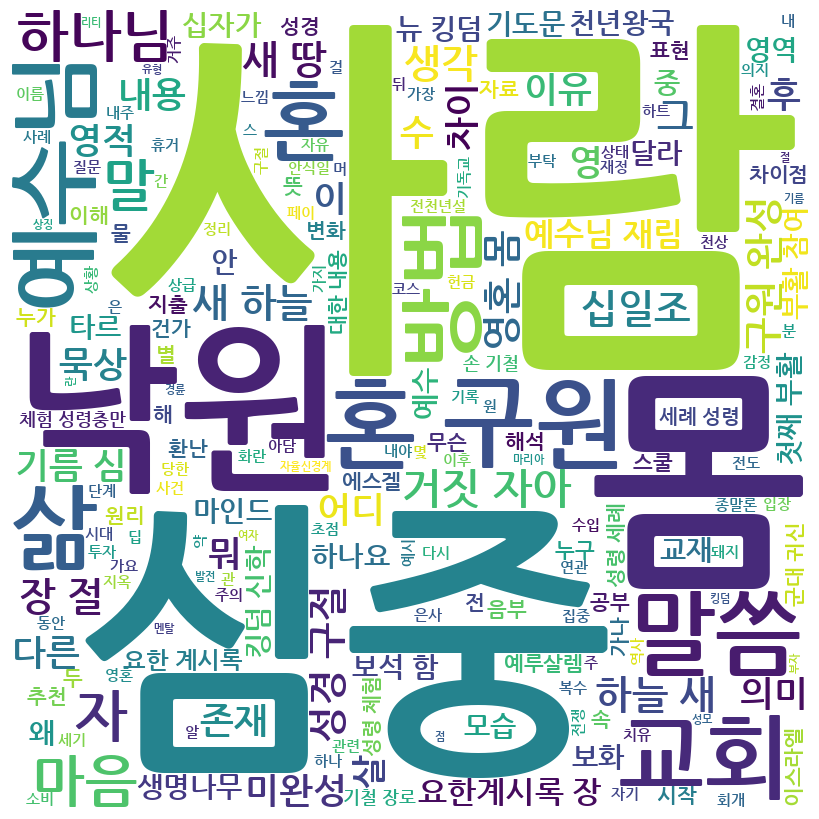

In [44]:
# 2. Stopwords 및 특수문자 필터링을 위한 준비

comment_words = ''
# stopwords = set(STOPWORDS)
stopwords = {
    "구체", "것", "때", "더", "대해", "설명", "무엇", "요"
}
tokenized_text = []

# # 3. 문장 데이터를 단어화하기
# for val in question_data["question"]:

#   # 문장을 string으로 만들기
#   val = str(val)

#   # 문장을 쪼개기
#   tokens = val.split()

#   tokenized_text.append(tokens)
#   comment_words += " ".join(tokens) + " "


# 3. 문장 데이터를 단어화하기
for token in tokenized_data:
  for val in token:
    tokenized_text.append(val)
  comment_words += " ".join(token) + " "

wordcloud = WordCloud(width = 800, height = 800,
                font_path='AppleGothic.ttf',
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)

# plot the WordCloud image
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()